<a href="https://colab.research.google.com/github/gorzanskik-ai/machine-learning/blob/main/supervised-learning/03_classification/05_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

sns.set(font_scale=1.3)
np.random.seed(42)

In [ ]:
from sklearn.datasets import load_iris

dataset = load_iris()
X = dataset['data']
y = dataset['target']

all_data = np.c_[X, y]

df_raw = pd.DataFrame(all_data, columns=list(dataset['feature_names']) + ['target'])
df = df_raw.copy()
df.head()

feature_names = [name.replace(' ', '_')[:-5] for name in dataset['feature_names']]
target_names = dataset['target_names']

In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)']]
y = df['target']

In [ ]:
X = X.values    #przejście na numpy
y = y.values.astype('int16')

Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X, y)

RandomForestClassifier()

In [ ]:
classifier.score(X, y)

0.9266666666666666

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


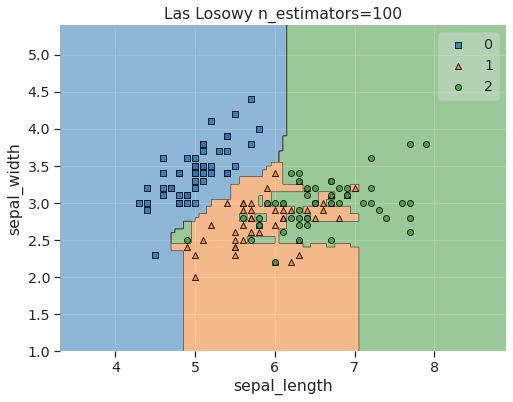

In [ ]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8, 6))
plot_decision_regions(X, y, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las Losowy n_estimators=100')
plt.show()

Model w oparciu o wszystkie oryginalne cechy

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset['data']
y = dataset['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (120, 4)
y_train shape: (120,)
X_test shape: (30, 4)
y_test shape: (30,)


In [ ]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

1.0

In [ ]:
classifier.feature_importances_

array([0.10753304, 0.03349005, 0.45187873, 0.40709819])

In [ ]:
import plotly.express as px

features = pd.DataFrame(data={'feature': feature_names, 'feature_importance': classifier.feature_importances_})

px.bar(features, x='feature', y='feature_importance', width=700, height=400)

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000
